In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_column', None)
pd.set_option('display.max_row', 100)
pd.set_option('display.max_colwidth', 222)

In [2]:
df = pd.read_csv("/home/abhi/Documents/DS_Projects/DS/kaggle_survey_2022/kaggle_survey_2022_responses.csv/kaggle_survey_2022_responses.csv")

In [3]:
df2 = df.iloc[1:]
df2.reset_index(inplace = True, drop = True)

In [4]:
df.head()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Q6_10,Q6_11,Q6_12,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q7_6,Q7_7,Q8,Q9,Q10_1,Q10_2,Q10_3,Q11,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q12_7,Q12_8,Q12_9,Q12_10,Q12_11,Q12_12,Q12_13,Q12_14,Q12_15,Q13_1,Q13_2,Q13_3,Q13_4,Q13_5,Q13_6,Q13_7,Q13_8,Q13_9,Q13_10,Q13_11,Q13_12,Q13_13,Q13_14,Q14_1,Q14_2,Q14_3,Q14_4,Q14_5,Q14_6,Q14_7,Q14_8,Q14_9,Q14_10,Q14_11,Q14_12,Q14_13,Q14_14,Q14_15,Q14_16,Q15_1,Q15_2,Q15_3,Q15_4,Q15_5,Q15_6,Q15_7,Q15_8,Q15_9,Q15_10,Q15_11,Q15_12,Q15_13,Q15_14,Q15_15,Q16,Q17_1,Q17_2,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q17_13,Q17_14,Q17_15,Q18_1,Q18_2,Q18_3,Q18_4,Q18_5,Q18_6,Q18_7,Q18_8,Q18_9,Q18_10,Q18_11,Q18_12,Q18_13,Q18_14,Q19_1,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q19_7,Q19_8,Q20_1,Q20_2,Q20_3,Q20_4,Q20_5,Q20_6,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q21_7,Q21_8,Q21_9,Q21_10,Q22,Q23,Q24,Q25,Q26,Q27,Q28_1,Q28_2,Q28_3,Q28_4,Q28_5,Q28_6,Q28_7,Q28_8,Q29,Q30,Q31_1,Q31_2,Q31_3,Q31_4,Q31_5,Q31_6,Q31_7,Q31_8,Q31_9,Q31_10,Q31_11,Q31_12,Q32,Q33_1,Q33_2,Q33_3,Q33_4,Q33_5,Q34_1,Q34_2,Q34_3,Q34_4,Q34_5,Q34_6,Q34_7,Q34_8,Q35_1,Q35_2,Q35_3,Q35_4,Q35_5,Q35_6,Q35_7,Q35_8,Q35_9,Q35_10,Q35_11,Q35_12,Q35_13,Q35_14,Q35_15,Q35_16,Q36_1,Q36_2,Q36_3,Q36_4,Q36_5,Q36_6,Q36_7,Q36_8,Q36_9,Q36_10,Q36_11,Q36_12,Q36_13,Q36_14,Q36_15,Q37_1,Q37_2,Q37_3,Q37_4,Q37_5,Q37_6,Q37_7,Q37_8,Q37_9,Q37_10,Q37_11,Q37_12,Q37_13,Q38_1,Q38_2,Q38_3,Q38_4,Q38_5,Q38_6,Q38_7,Q38_8,Q39_1,Q39_2,Q39_3,Q39_4,Q39_5,Q39_6,Q39_7,Q39_8,Q39_9,Q39_10,Q39_11,Q39_12,Q40_1,Q40_2,Q40_3,Q40_4,Q40_5,Q40_6,Q40_7,Q40_8,Q40_9,Q40_10,Q40_11,Q40_12,Q40_13,Q40_14,Q40_15,Q41_1,Q41_2,Q41_3,Q41_4,Q41_5,Q41_6,Q41_7,Q41_8,Q41_9,Q42_1,Q42_2,Q42_3,Q42_4,Q42_5,Q42_6,Q42_7,Q42_8,Q42_9,Q43,Q44_1,Q44_2,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, university, or graduate)",On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Coursera,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - edX,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Kaggle Learn Courses,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - DataCamp,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Fast.ai,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Udacity,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Udemy,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - LinkedIn Learning,"On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Cloud-certification programs (direct from AWS, Azure, GCP, or similar)",On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - University Courses (resulting in a university degree),On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - None,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Other,What products or platforms did you find to be most helpful when you first started studying data science? (Select all that apply) - Selected Choice - University courses,"What products or platforms did you find to be most helpful when you first started studying data science? (Select all that apply) - Selected Choice - Online courses (Coursera, EdX, etc)","What products or platforms did you find to be most helpful wh

In [5]:
q61 = df.iloc[1:, 5: 17]
# q6.columns=["Coursera","edX","Kaggle Learn Courses","DataCamp","Fast.ai","Udacity","Udemy","LinkedIn Learning","Certification program","University Courses","None","Other"]

In [6]:
# dd = pd.DataFrame(q6.notna().sum()).T

# Feature Selection-

### These are the features we are going to work on-

1.Are you currently a student?

2.In which country do you currently reside?

3.What is your gender?

4.What is your age (# years)?

5.What products or platforms did you find to be most helpful when you first started studying data science?

6.What is the highest level of formal education that you have attained or plan to attain within the next 2 years?

7.For how many years have you been writing code and/or programming?

8.What programming languages do you use on a regular basis? (Select all that apply)

In [7]:
#Q5 Are you currently a student ?
student= df2.Q5

# Q5 In which country do you currently reside?
country= df2.Q4

# Q3 What is your gender?
gender=df2.Q3

#Q7_1 to Q7_7 it is feature for most helpfull platform or product to study data science 
helpfull_platform = df2.iloc[:, 17:24]
helpfull_platform.columns= ['university_courses', 'online_courses', 'social_media_platforms', 'video_platforms', 'kaggle', 'none', 'other']

# Q8 What is the highest level of formal education that 
# you have attained or plan to attain within the next 2 years?
formal_education = df2.Q8

# Q11 For how many years have you been writing code and/or programming?
coding_experience = df2.Q11

# Q12 What programming languages do you use on a regular basis? (Select all that apply)
coding_language = df2.iloc[:, 30:45]

my_list = []
for i in coding_language.columns:
    my_list.append(coding_language[i].unique()[1])

coding_language.columns = my_list

In [8]:
helpfull_platform

,university_courses,online_courses,social_media_platforms,video_platforms,kaggle,none,other
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,University courses,NaN,NaN,NaN,"Kaggle (notebooks, competitions, etc)",NaN,NaN
2,NaN,"Online courses (Coursera, EdX, etc)",NaN,"Video platforms (YouTube, Twitch, etc)","Kaggle (notebooks, competitions, etc)",NaN,NaN
3,NaN,"Online courses (Coursera, EdX, etc)",NaN,NaN,"Kaggle (notebooks, competitions, etc)",NaN,NaN
4,University courses,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
23992,University courses,NaN,NaN,"Video platforms (YouTube, Twitch, etc)","Kaggle (notebooks, competitions, etc)",NaN,Other
23993,University courses,NaN,NaN,"Video platforms (YouTube, Twitch, etc)",NaN,NaN,NaN
23994,NaN,"Online courses (Coursera, EdX, etc)","Social media platforms (Reddit, Twitter, etc)","Video platforms (YouTube, Twitch, etc)","Kaggle (notebooks, competitions, etc)",NaN,NaN
23995,NaN,NaN,NaN,NaN,"Kaggle (notebooks, competitions, etc)",NaN,NaN


## Ploting

In [20]:
# plt.figure(figsize=(15,5))
# sns.countplot(x=student, hue=gender)

In [19]:
# plt.figure(figsize=(16,6))
# dd = pd.DataFrame(helpfull_platform.notna().sum()).T
# ax = sns.barplot(data=dd)
# ax.tick_params(axis='x', rotation=45)
# plt.title('On which platforms have you begun or completed data science courses?')
# plt.show()

In [18]:
# plt.figure(figsize=(20,10))
# ax = sns.countplot(x=country, hue=student)
# ax.tick_params(axis='x', rotation=90)

In [12]:
# pd.crosstab(country,[student, gender])

In [21]:
helpfull_platform.columns

Index(['university_courses', 'online_courses', 'social_media_platforms',
       'video_platforms', 'kaggle', 'none', 'other'],
      dtype='object')

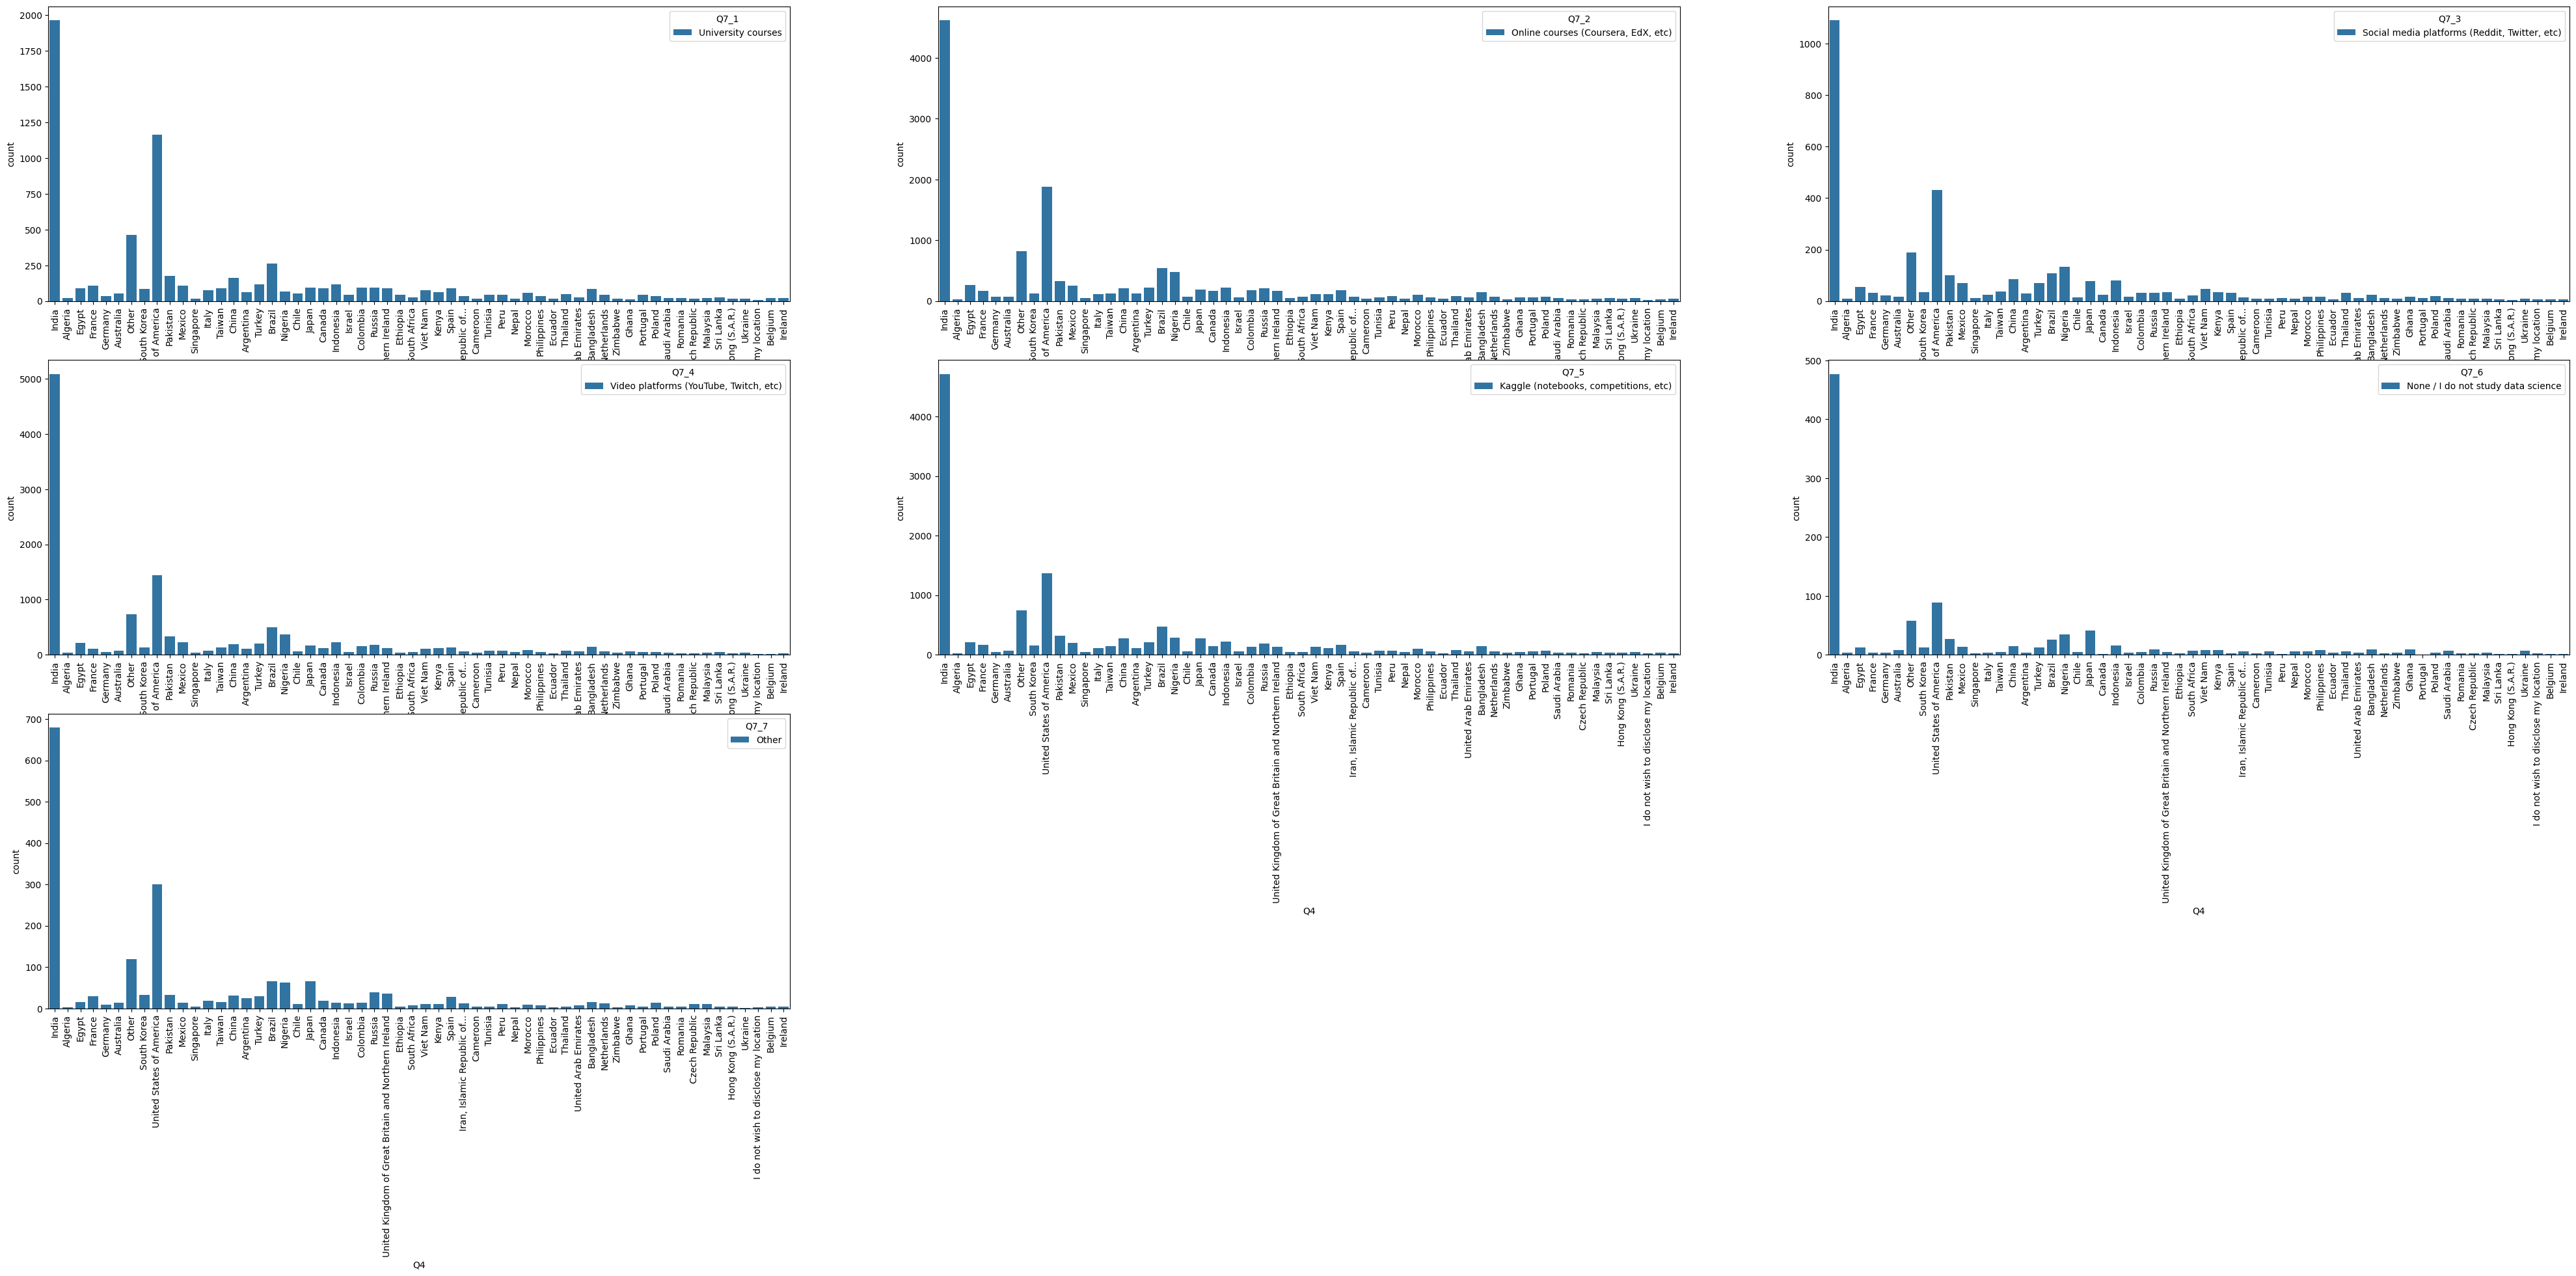

In [17]:
plt.figure(figsize = (50,20))

# Ploted the country and helpfull 1st feature 'university_courses'
# plt.subplot(3,2,1)
plt.subplot(331)
# plt.figure(figsize=(15,5))
ax = sns.countplot(x=df2['Q4'], hue=df2['Q7_1'])
ax.tick_params(axis='x', rotation=90)

# Ploted the country and helpfull 2nd feature 'online_courses'
plt.subplot(332)
# plt.figure(figsize=(15,5))
ax = sns.countplot(x=df2['Q4'], hue=df2['Q7_2'])
ax.tick_params(axis='x', rotation=90)

# Ploted the country and helpfull 3rd feature 'social_media_platforms'
plt.subplot(333)
# plt.figure(figsize=(15,5))
ax = sns.countplot(x=df2['Q4'], hue=df2['Q7_3'])
ax.tick_params(axis='x', rotation=90)

# Ploted the country and helpfull 4th feature 'video_platform'
plt.subplot(334)
# plt.figure(figsize=(15,5))
ax = sns.countplot(x=df2['Q4'], hue=df2['Q7_4'])
ax.tick_params(axis='x', rotation=90)

# Ploted the country and helpfull 5th feature 'kaggle'
plt.subplot(335)
# plt.figure(figsize=(15,5))
ax = sns.countplot(x=df2['Q4'], hue=df2['Q7_5'])
ax.tick_params(axis='x', rotation=90)

# Ploted the country and helpfull 6th feature 'none'
plt.subplot(336)
# plt.figure(figsize=(15,5))
ax = sns.countplot(x=df2['Q4'], hue=df2['Q7_6'])
ax.tick_params(axis='x', rotation=90)

# Ploted the country and helpfull 7th feature 'other'
plt.subplot(337)
# plt.figure(figsize=(15,5))
ax = sns.countplot(x=df2['Q4'], hue=df2['Q7_7'])
ax.tick_params(axis='x', rotation=90)
